<a href="https://colab.research.google.com/github/Ramraje02/OIBSIP_TASK_4/blob/main/Email_Spam_Collection_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Liabraries

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('/content/spam.csv',encoding = "latin-1")

In [7]:
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [8]:

data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [9]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.rename(columns = {"v1":"Target", "v2":"Mail Info"},inplace = True)
data.head()

,Target,Mail Info
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.shape

(5572, 2)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Target     5572 non-null   object
 1   Mail Info  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
data.describe()

,Target,Mail Info
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# Class Distribution

<Axes: xlabel='Target', ylabel='count'>

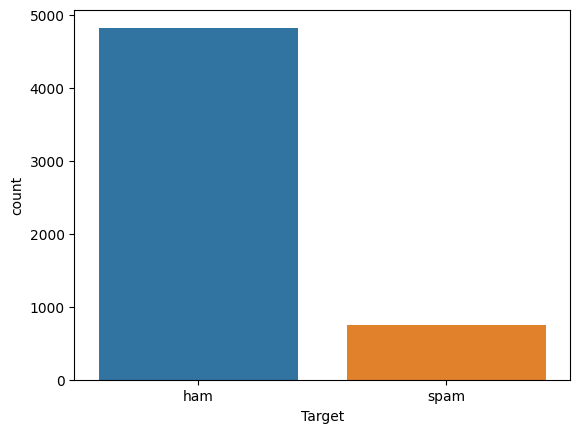

In [14]:
sns.countplot(x = data["Target"])

# Removes the Duplicate Targets

In [15]:
data.duplicated().sum()

403

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data

,Target,Mail Info
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
data.shape

(5169, 2)

# Feature Extraction and Matrix Conversion

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = data['Mail Info']
y = data['Target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [22]:
cv = CountVectorizer()
x_train_vec = cv.fit_transform(x_train.values)

In [23]:
x_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Model Training

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
mnb = MultinomialNB()
mnb.fit(x_train_vec, y_train)

MultinomialNB()

# Evaluation

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
x_test_vec = cv.transform(x_test)
predictions = mnb.predict(x_test_vec)

In [28]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       889
        spam       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034

[[887   2]
 [ 13 132]]


# Pipeline

In [29]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("cv", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
     ("model", MultinomialNB())
])

In [30]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [31]:
predictions = pipeline.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       889
        spam       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

[[889   0]
 [ 46  99]]


In [32]:
test_data = pd.DataFrame(x_test)

In [33]:
test_data["Actual"] = y_test
test_data["Predicted"] = predictions


In [34]:
test_data[test_data.Actual != test_data.Predicted]

,Mail Info,Actual,Predicted
3300,RCT' THNQ Adrian for U text. Rgds Vatian,spam,ham
4405,As one of our registered subscribers u can ent...,spam,ham
4408,For your chance to WIN a FREE Bluetooth Headse...,spam,ham
65,"As a valued customer, I am pleased to advise y...",spam,ham
2429,Guess who am I?This is the first time I create...,spam,ham
3419,"As a valued customer, I am pleased to advise y...",spam,ham
4014,You will be receiving this week's Triple Echo ...,spam,ham
730,Email AlertFrom: Jeri StewartSize: 2KBSubject:...,spam,ham
1216,You have 1 new voicemail. Please call 08719181...,spam,ham
4614,Sunshine Quiz! Win a super Sony DVD recorder i...,spam,ham
